In [1]:
# initialization
import numpy as np
from numpy import pi

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
# init variables
n = 2 # number of qubits

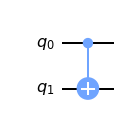

In [20]:
# Oracle - balanced
# oracle_qreg_q = QuantumRegister(2, 'q')
balanced_oracle_circuit = QuantumCircuit(2, name='balanced oracle')

balanced_oracle_circuit.cx(0, 1)

balanced_oracle_circuit.to_gate()
balanced_oracle_circuit.draw('mpl')

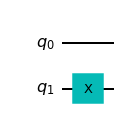

In [21]:
# Oracle - constant
# oracle2_qreg_q = QuantumRegister(2, 'q')
# oracle_creg_c = ClassicalRegister(0, 'c')
constant_oracle_circuit = QuantumCircuit(2, name='const oracle')

constant_oracle_circuit.x([1])
constant_oracle_circuit.to_gate()
constant_oracle_circuit.draw('mpl')

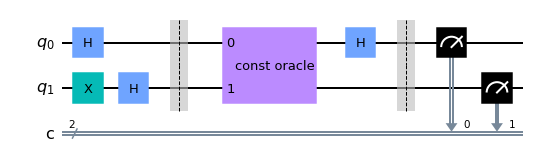

In [5]:
# main circuit - deutch's algorithm:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
    
circuit.barrier()

circuit.append(constant_oracle_circuit, [qreg_q[0],qreg_q[1]])
# circuit.append(balanced_oracle_circuit, [qreg_q[0],qreg_q[1]])

circuit.h(qreg_q[0])
# circuit.h(qreg_q[1])

circuit.barrier()

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

circuit.draw('mpl')

In [6]:
# Print state vector
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**n)

# Evolve the state by the quantum circuit
# state = state.evolve(circuit)

# #draw using latex
# state.draw('latex')

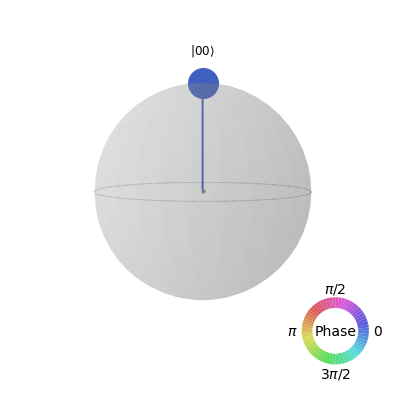

In [7]:
state.draw('qsphere')

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline

# state = Statevector.from_instruction(circuit)
# plot_bloch_multivector(state, title="New Bloch Multivector", reverse_bits=False)

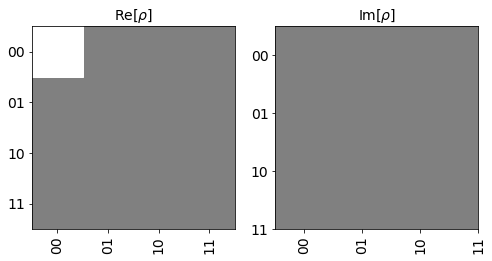

In [9]:
state.draw('hinton')

In [10]:
# use local simulator - can't run simlation because of inner gates
# aer_sim = Aer.get_backend('aer_simulator')
# shots = 1024
# qobj = assemble(circuit, aer_sim)
# results = aer_sim.run(qobj).result()
# answer = results.get_counts()

# plot_histogram(answer)

In [ ]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()

In [ ]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n) and
                                                         not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

In [12]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_circuit = transpile(circuit, backend, optimization_level=0)
# job = backend.run(transpiled_circuit)
# job_monitor(job, interval=2)